In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations 

np.random.seed(29)


Simulating 3 rolled d6

In [4]:
#number of trials
n_trials = nrows = 10_000
n_dice = ncols = 3

#using random choice
#selects from the provided list - [1, 2, 3, 4, 5, 6]

#rolls represents the events
# we will need number_trials * number_of_dice
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls



array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

In [5]:
#take sums of each event
sums_by_trial = rolls.sum(axis=1)

#returns the array of sums
sums_by_trial

array([15, 10,  5, ...,  9, 10, 10])

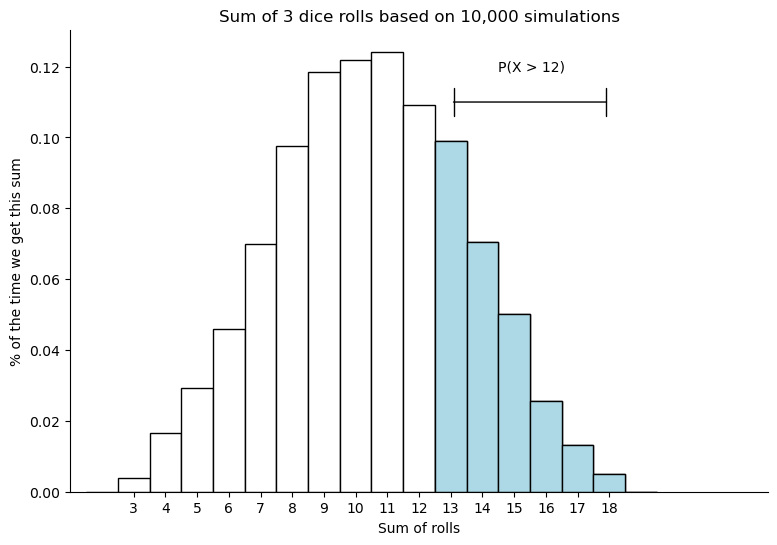

In [6]:
#displays distribution of the sum of three dice in our simulation
viz.simulation_example1(sums_by_trial)


In [24]:
#find the number of wins
#use a comparision operator

#number of wins
wins = sums_by_trial > 12

#returns wins
wins


array([ True, False, False, ..., False, False, False])

In [10]:
#summing number of wins
wins_sum = sum(sums_by_trial > 12)
wins_sum


2633

In [16]:
loss_sum = 10_000 - wins_sum
loss_sum

7367

In [25]:
#win rate
#number of wins / total trials
win_rate = wins_sum / 10_000
win_rate

0.2633

In [26]:
#faster way to get to the win rate
#since all of our results are boolean statements, the win rate is equal to the mean
win_rate = wins.astype(int).mean()
win_rate


0.2633

In [20]:
#cost to play = $5
#win (sum over 12) = $15

#profit = winnings - cost

In [28]:
#a way to calucalate estimated profit per game

#likelihood of winning * money earned per win
expected_winnings = win_rate * 15

#cost per game
cost = 5

#subtract cost
expected_profit = expected_winnings - cost

#return profit
expected_profit


-1.0505000000000004

In [19]:
#changing our win condition to include 12
wins = sums_by_trial >= 12

#getting our win rate by getting the mean of our boolean values
win_rate = wins.astype(int).mean()

#again, the money earned
expected_winnings = win_rate * 15

#cost of each game
cost = 5

#how much we will make on average per game
expected_profit = expected_winnings - cost
expected_profit


0.5860000000000003

In [32]:
#a toddler naps on the weekend
#p(nap on weekend) - .3

p_nap = 0.3
ndays = ncols = 2

#100_000 trials
n_simulated_weened = nrows = 10**5


In [33]:
#

data = np.random.random([nrows, ncols])
data

array([[0.87277802, 0.06662938],
       [0.1005453 , 0.53758065],
       [0.87948952, 0.81734258],
       ...,
       [0.62190839, 0.70887448],
       [0.58618203, 0.66032846],
       [0.3792302 , 0.66217077]])

In [34]:
#how many naps occured using the generated random value

naps = data < p_nap
naps

array([[False,  True],
       [ True, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [35]:
sum(naps)

array([29770, 30363])

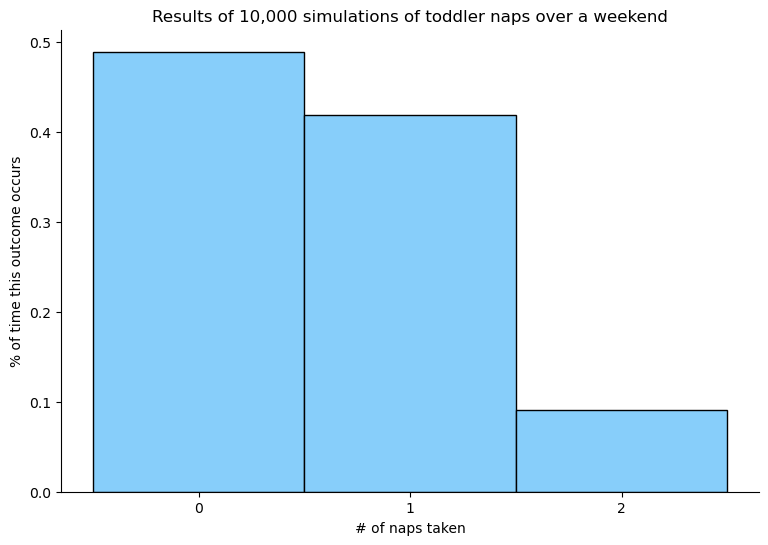

In [36]:

viz.simulation_example2(naps)

In [38]:
#at least 1 nap
# >= 1
#mean is total greater than or equal to 1 / number of trials
(naps.sum(axis=1) >= 1).mean()

0.51039

In [39]:
#no naps
(naps.sum(axis=1) == 0).mean()

0.48961

In [46]:
#using a dataframe
#dice rolls

#this is the number of simulations 10**5 meaning 100_000
n_simulations = nrows = 10**5

#the number of items within each simulation
n_dice_rolled = ncols = 3

#setting up what each choice within our simulations can be equal to
#and shaping it to fit the format structured as a matrix, it being 3 columns x 100_000 rows
rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

#convert to a dataframe
(pd.DataFrame(rolls) #syntax to convert to a dataframe
 .apply(lambda row: 3 in row.values, axis=1) #checks to see if one of the rolls was a 3
 .mean()) #getting the mean of how many times it happened


0.42283